# Problem Set 7

In [1]:
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import pandas as pd
import qeds

## Question 1

From [Data Visualization: Rules and Guidelines](../applications/visualization_rules.ipynb)

Create a bar chart of the below data on Canadian GDP growth.
Use a non-red color for the years 2000 to 2008, red for
2009, and the first color again for 2010 to 2018.

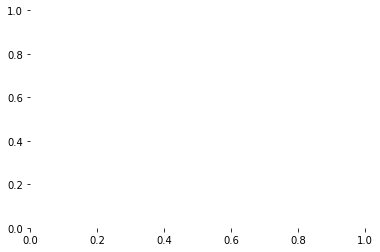

In [2]:
ca_gdp = pd.Series(
    [5.2, 1.8, 3.0, 1.9, 3.1, 3.2, 2.8, 2.2, 1.0, -2.8, 3.2, 3.1, 1.7, 2.5, 2.9, 1.0, 1.4, 3.0],
    index=list(range(2000, 2018))
)

fig, ax = plt.subplots()

for side in ["right", "top", "left", "bottom"]:
    ax.spines[side].set_visible(False)

## Question 2

From [Data Visualization: Rules and Guidelines](../applications/visualization_rules.ipynb)

Draft another way to organize time and education by modifying the code below.
That is, have two subplots (one for each
education level) and four groups of points (one for each year).

Why do you think they chose to organize the information the way they
did rather than this way?

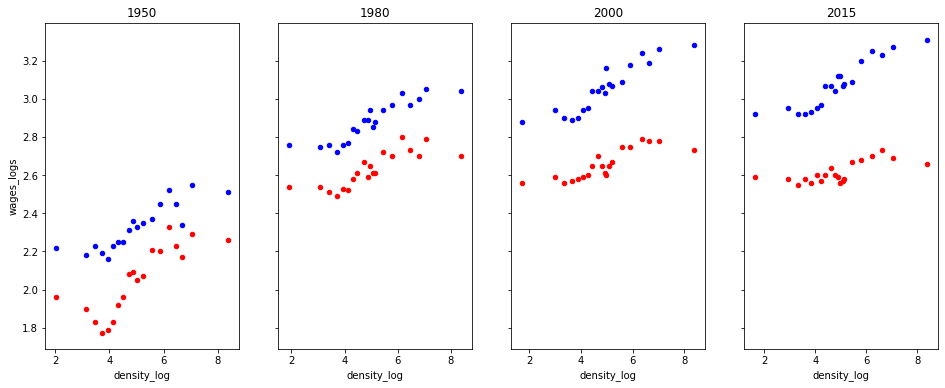

In [3]:
# Read in data
df = pd.read_csv("https://datascience.quantecon.org/assets/data/density_wage_data.csv")
df["year"] = df.year.astype(int)  # Convert year to int


def single_scatter_plot(df, year, educ, ax, color):
    """
    This function creates a single year's and education level's
    log density to log wage plot
    """
    # Filter data to keep only the data of interest
    _df = df.query("(year == @year) & (group == @educ)")
    _df.plot(
        kind="scatter", x="density_log", y="wages_logs", ax=ax, color=color
    )

    return ax

# Create initial plot
fig, ax = plt.subplots(1, 4, figsize=(16, 6), sharey=True)

for (i, year) in enumerate(df.year.unique()):
    single_scatter_plot(df, year, "college", ax[i], "b")
    single_scatter_plot(df, year, "noncollege", ax[i], "r")
    ax[i].set_title(str(year))

## Questions 3-5

These question uses a dataset from the [Bureau of Transportation
Statistics]([https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time))
that describes the cause for all US domestic flight delays
in November 2016. We used the same data in the previous problem set.

In [4]:
air_perf = qeds.load("airline_performance_dec16") #[["CRSDepTime", "Carrier", "CarrierDelay", "ArrDelay"]]
air_perf.info()
air_perf.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460949 entries, 0 to 460948
Data columns (total 36 columns):
Carrier               460949 non-null object
TailNum               459689 non-null object
FlightNum             460949 non-null int64
OriginCityMarketID    460949 non-null int64
Origin                460949 non-null object
OriginCityName        460949 non-null object
OriginStateName       460949 non-null object
DestCityMarketID      460949 non-null int64
Dest                  460949 non-null object
DestCityName          460949 non-null object
DestStateName         460949 non-null object
CRSDepTime            460949 non-null datetime64[ns]
DepTime               453665 non-null datetime64[ns]
DepDelay              453722 non-null float64
TaxiOut               453543 non-null float64
WheelsOff             453543 non-null float64
WheelsOn              453219 non-null float64
TaxiIn                453219 non-null float64
CRSArrTime            460949 non-null datetime64[ns]
ArrTime 

<bound method NDFrame.head of        Carrier TailNum  FlightNum  OriginCityMarketID Origin  \
0           AA  N3JHAA         46               31650    MSP   
1           AA  N3DPAA         46               31650    MSP   
2           AA  N3KUAA         46               31650    MSP   
3           AA  N3FBAA         46               31650    MSP   
4           AA  N3BLAA         46               31650    MSP   
5           AA  N3BEAA         46               31650    MSP   
6           AA  N566AA         46               31650    MSP   
7           AA  N3NSAA         46               31650    MSP   
8           AA  N3DGAA         46               31650    MSP   
9           AA  N3BXAA         46               31650    MSP   
10          AA  N3MUAA         46               31650    MSP   
11          AA  N3EHAA         46               31650    MSP   
12          AA  N4XMAA         46               31650    MSP   
13          AA  N4XBAA         50               31123    STL   
14        

The following questions are intentionally somewhat open-ended. For
each one, carefully choose the type of visualization you’ll create.
Put some effort into choosing colors, labels, and other
formatting.

### Question 3

Create a visualization of the relationship between airline (carrier)
and delays.

### Question 4

Create a visualization of the relationship between date and delays.

### Question 5

Create a visualization of the relationship between location (origin
and/or destination) and delays.